# Exploratory Data Analysis(EDA) with Seaborn and Pandas

# Importing Pandas, Seaborn library and loading dataset

In [ ]:
#Importing pandas & seaborn library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading Data Set
housing = pd.read_csv('datasets/house_train.csv')

# Dimensionality of the dataset - the number of rows and columns

In [3]:
# Dimensionality of DataFrame - (Rows,Columns)
housing.shape

(1460, 81)

# Printing information about a DataFrame including the index dtype and columns, non-null values and memory usage

In [4]:
# Getting concise information about a DataFrame - index dtype and columns dtypes, non-null values & memory usage.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Understanding Data and Dropped Columns

- Dropped the columns which were containing low values and not making sense to perfom EDA.

- Segrregated data columns into Numerical Data and Categorical Data.

**Numerical variables**

- **SalePrice**
- **LotArea:** Lot size in square feet
- **OverallQual:** Rates the overall material and finish of the house
- **OverallCond:** Rates the overall condition of the house
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **YearBuilt:** Original construction date (this is not technically a numeric variable but we will use it to produce another variable called Age)

**Categorical variables**

- **MSZoning:** Identifies the general zoning classification of the sale.
- **LotShape:** General shape of property
- **Neighborhood:** Physical locations within Ames city limits
- **CentralAir:** Central air conditioning
- **SaleCondition:** Condition of sale
- **MoSold:** Month Sold (MM)
- **YrSold:** Year Sold (YYYY)

# New DataFrame of shortlisted columns

In [5]:
numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

In [13]:
# Concatinating columns and dumping it back to the housing dataset
housing = housing[numerical_vars+categorical_vars]
housing.shape

(1460, 15)

# Understanding the main variable using describe ( )

In [7]:
#Displaying basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Making Histogram of main variable 'SalePrice'

<AxesSubplot:>

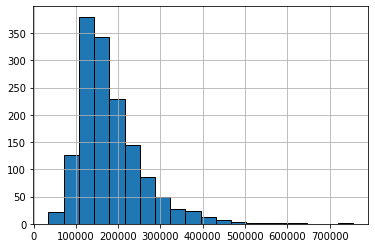

In [14]:
# Distribution of data represented by Histogram.
# Pandas DataFrame.hist() it autmatically calls function matplotlib.pyplot.hist() on each series in DataFrame.
housing['SalePrice'].hist(edgecolor='black', bins=20)

**Histogram of 'SalePrice' column shows the data distrubution is right skewed. 
The majority of houses price is between `$100000` - `$300000`**

# Basic statiscal details of Numerical Variables

In [9]:
# #Displaying basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
housing[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


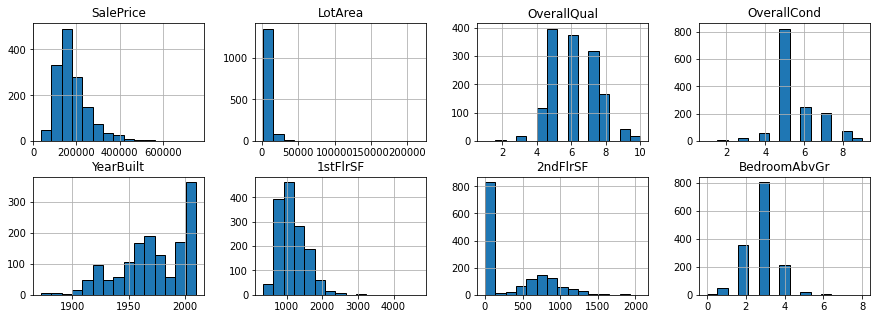

In [10]:
# Distribution of data represented by Histogram
# to suppress some light warnings. we are suppressing some future update warnings 
import warnings 
warnings.filterwarnings("ignore")  

# bins: histogram displays numerical data by grouping data into "bins" of equal width.
#       Each bin is plotted as a bar whose height corresponds to how many data points are in that bin.

# figzie: The size in inches of the figure to create. 

# layout: Tuple of (rows, columns) for the layout of the histograms.
housing[numerical_vars].hist(edgecolor='black', bins=15, figsize=(15, 5), layout = (2,4));


**Insights:**
1. The distribution of sizes of the first floor is skewed to the right. There are a few big houses.
2. There is a big peak at zero in the 2ndFlrSF variable. Those are the variables that don't have a second floor, so we can identify a new variable from this one.
3. Most houses have 3 bedrooms.
4. The lot area is highly skewed: there few houses with a large lot area.
5. The ratings for conditions and quality tend to be around 5, few houses have very high or low ratings.
6. The `YearBuilt` variable is actually not useful in the present form. However we can use it to construct a variable that actually make sense: **Age of the house** at the time of sale.

# Creating new variable 'Age', Removing 'YearBuilt' and Appending 'Age'

In [11]:
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
numerical_vars.remove('YearBuilt')
numerical_vars.append('Age')


# Distribution of data represented by Histogram

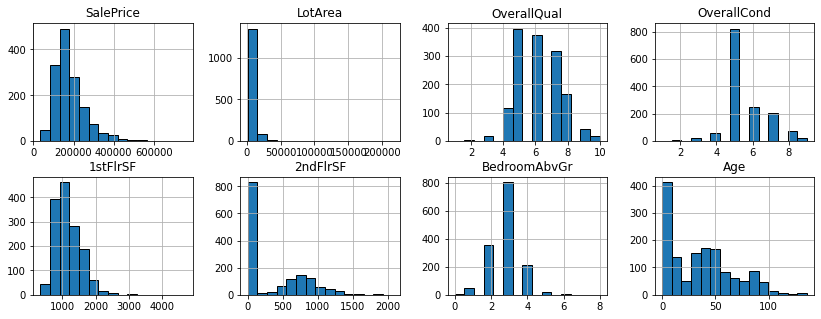

In [12]:
housing[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));


**Now, it is very clear that many houses were new when they were sold.**


# Basic statiscal details of Categorical Variables

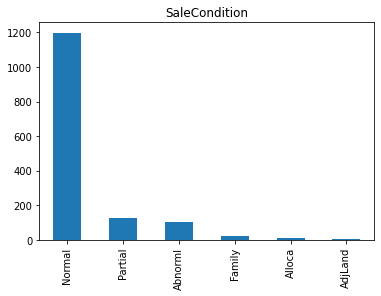

In [16]:
# using value_counts() to count the Salecondiiton of houses
housing['SaleCondition'].value_counts().plot(kind='bar', title='SaleCondition');

# Plotting all the Categorical Data

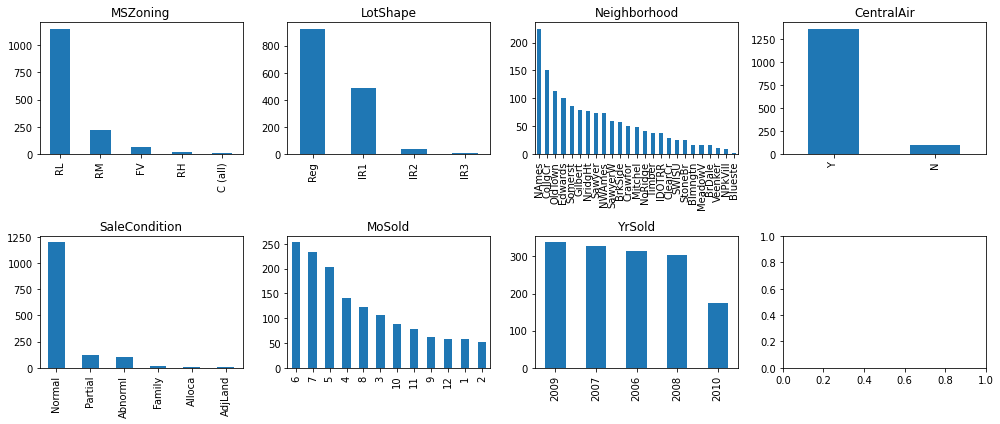

In [21]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()


# Filtering out less important Columns and keeping Categorical Data with more than 30 entries

In [27]:
# Fucntion to check value counts of each categorical data and returning list of those more than 30 to reduce low categorical values
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [26]:
# Using apply() to apply 'identify_cat_above30' function each categorical variables of housing data
levels_to_keep = housing[categorical_vars].apply(identify_cat_above30)
levels_to_keep

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
MoSold                     [6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object

In [29]:
housing.shape

(1246, 15)

# Checking each categorical column  in housing DataFrame</font>

In [ ]:
for var in categorical_vars:
    housing = housing.loc[housing[var].isin(levels_to_keep[var])]

In [30]:
housing.shape

(1246, 15)

# Plotting Categorical Data</font>

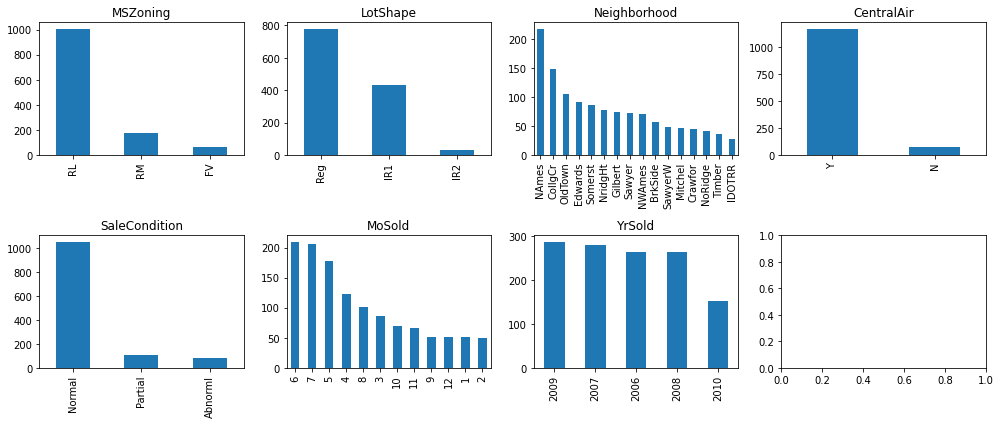

In [31]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

# Relationship Between Numerical Variables

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

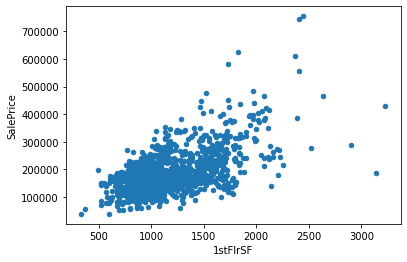

In [33]:
housing.plot.scatter(x='1stFlrSF',y='SalePrice')

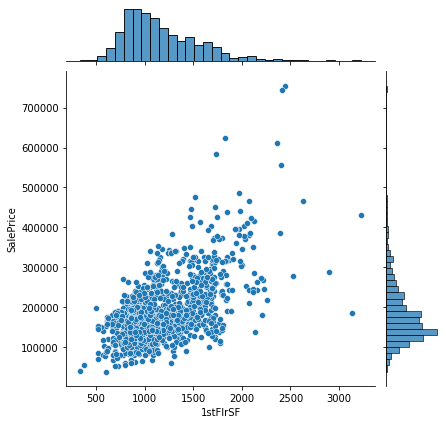

In [36]:
#jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.
sns.jointplot(x='1stFlrSF', y='SalePrice', data=housing);

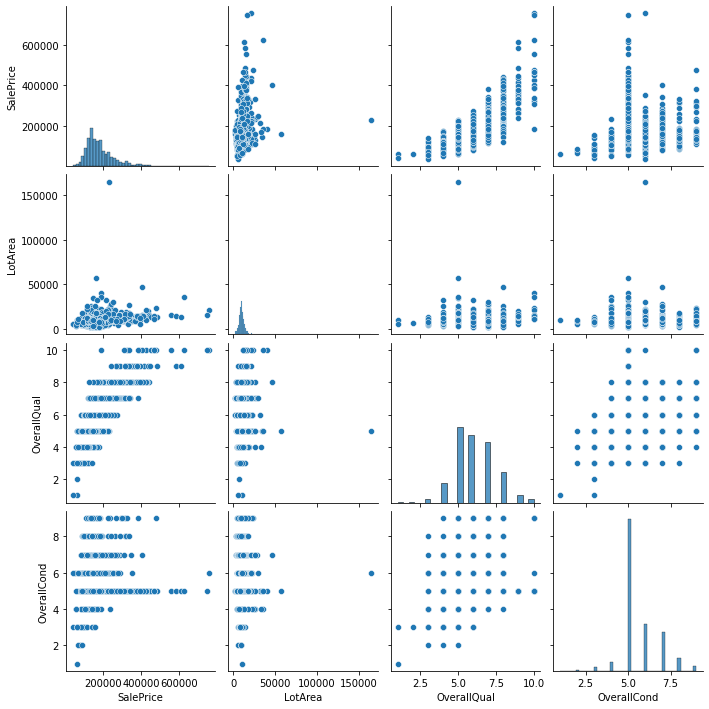

In [47]:
# Plotting first 4 numerical values.
sns.pairplot(housing[numerical_vars[:4]])

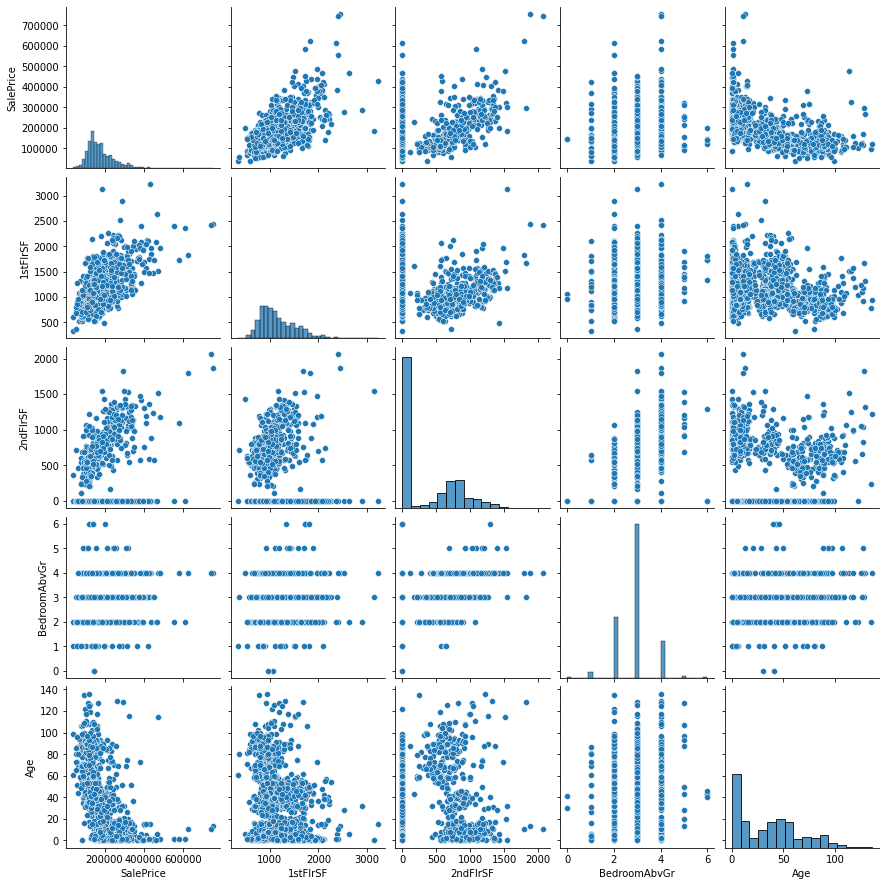

In [48]:
# Plotting 'SalePrice' + last 4 numerical values.
sns.pairplot(housing[['SalePrice']+numerical_vars[4:]])

# Pairwise Correlation of all olumns in the dataframe

In [51]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.264047,0.803188,-0.101111,0.611263,0.354388,0.218890,-0.530739
LotArea,0.264047,1.000000,0.119991,-0.021709,0.317519,0.071973,0.190736,-0.038842
OverallQual,0.803188,0.119991,1.000000,-0.109034,0.459432,0.345501,0.162826,-0.568832
OverallCond,-0.101111,-0.021709,-0.109034,1.000000,-0.155206,0.008419,-0.021736,0.420063
1stFlrSF,0.611263,0.317519,0.459432,-0.155206,1.000000,-0.213051,0.157983,-0.277169
2ndFlrSF,0.354388,0.071973,0.345501,0.008419,-0.213051,1.000000,0.486526,-0.050952
BedroomAbvGr,0.218890,0.190736,0.162826,-0.021736,0.157983,0.486526,1.000000,0.002496
Age,-0.530739,-0.038842,-0.568832,0.420063,-0.277169,-0.050952,0.002496,1.000000


In [52]:
# Finding correlation of all features w.r.t SalePrice.
# And values are being sorted by sort_values()
housing[numerical_vars].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.803188
1stFlrSF        0.611263
2ndFlrSF        0.354388
LotArea         0.264047
BedroomAbvGr    0.218890
OverallCond    -0.101111
Age            -0.530739
Name: SalePrice, dtype: float64

In [53]:
correlations = housing[numerical_vars].corr()

# Graphical representation of data using colors to visualize the value of the matrix

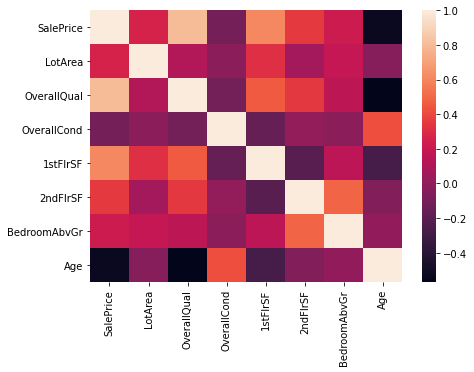

In [54]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

# Relationship of SalePrice with categorical variables

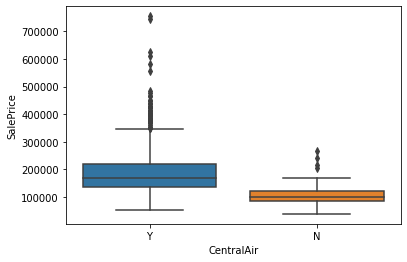

In [55]:
#standard plot to examine the relationship between a numerical and a categorical variable is the boxplot.
#A boxplot is a convenient way of graphically depicting groups of numerical data through their quartiles
sns.boxplot(x='CentralAir', y='SalePrice', data=housing);

# Plotting categorical data

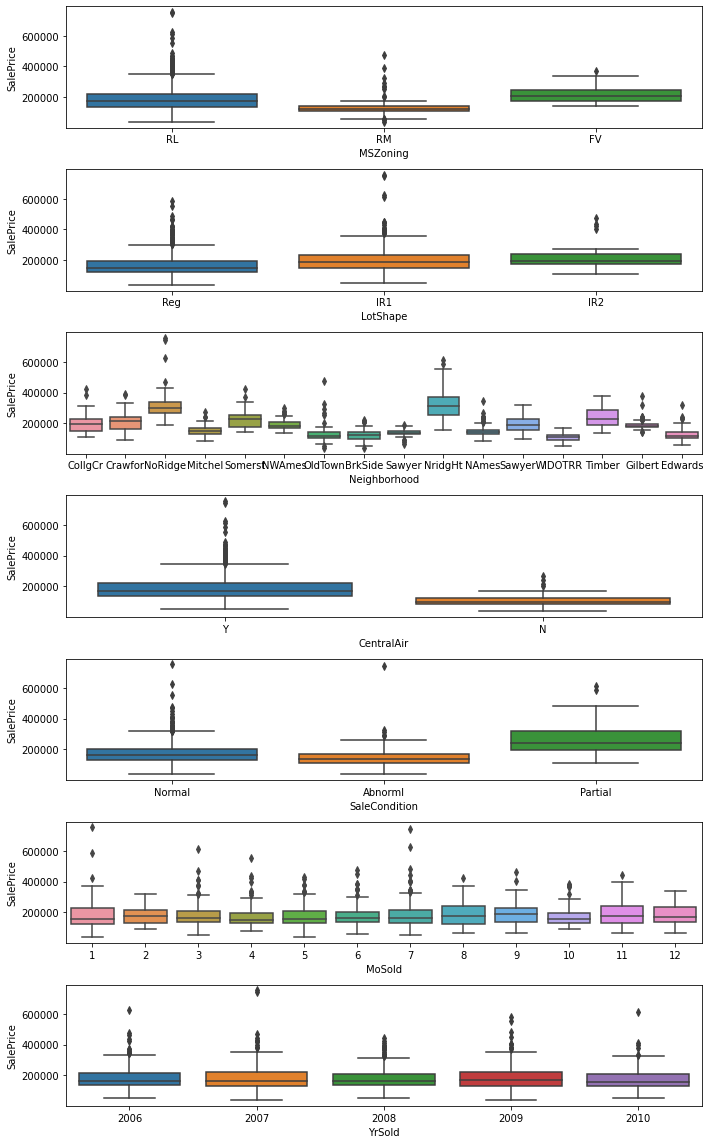

In [57]:
fig, ax = plt.subplots(7,1, figsize=(10,16))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

fig.tight_layout()

# Relationship of SalePrice vs. Neighborhood

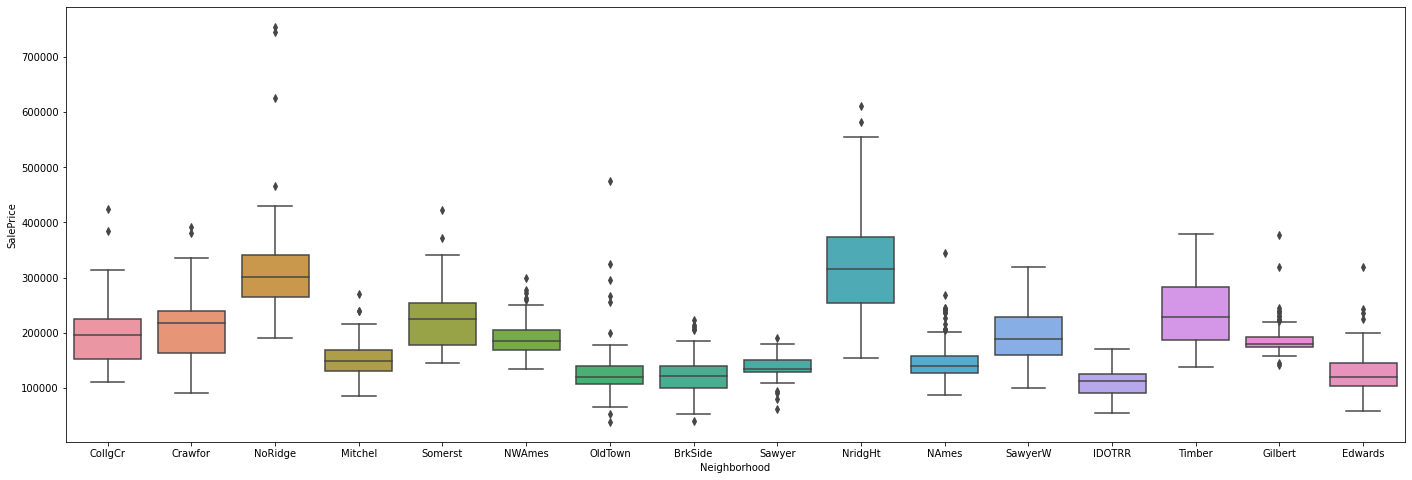

In [59]:
# Relationship of SalePrice vs. Neighborhood is not so clear above.
# redrawing
fig, ax = plt.subplots(figsize=(24,8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, ax=ax);